## Fast.ai Deep Learning 1 Practice - Multi-label prediction 

This notebook is practice for Lesson 3 of the [Fast.ai](https://www.fast.ai) course. It uses the [Planet Amazon dataset](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space) from Kaggle.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

Dataset must be downloaded from Kaggle, which requires an account. An API key must be created and the Kaggle API has to be installed as described [here](https://github.com/Kaggle/kaggle-api#installation).

In [3]:
path = Path('/path/to/Datasets/planet/')

In [4]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [5]:
# since images are of something that is relatively flat, i.e. the planet, we set warp to 0.
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [6]:
np.random.seed(42)

src = (ImageList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
      .split_by_rand_pct(0.2)
      .label_from_df(label_delim=' '))

In [7]:
data = (src.transform(tfms, size=128)
       .databunch().normalize(imagenet_stats))

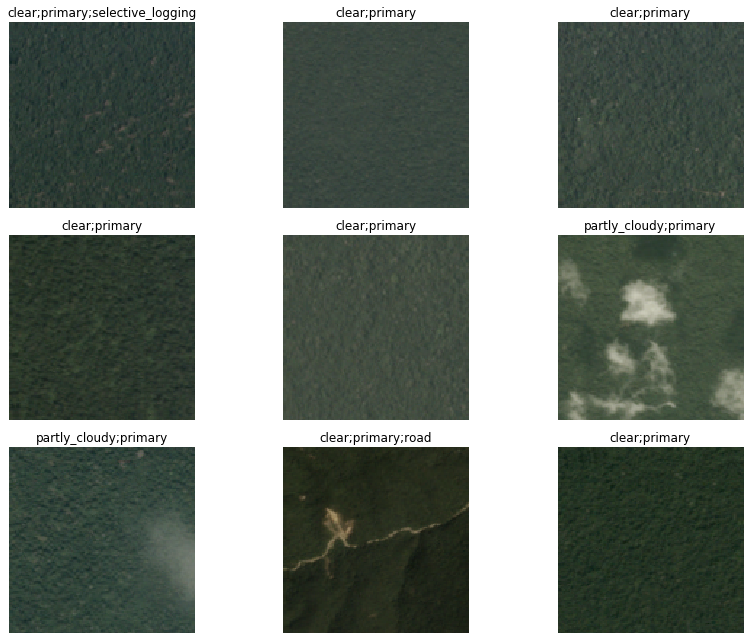

In [8]:
data.show_batch(rows=3, figsize=(12, 9))

In [9]:
# define architecture to use
arch = models.resnet50

In [10]:
# create partials for the metrics

acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)

learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

In [14]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


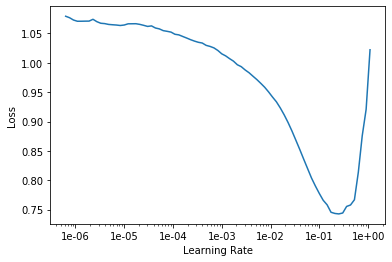

In [15]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(5, slice(0.01))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.137812,0.116600,0.944963,0.892480,01:10
1,0.115133,0.097854,0.952730,0.916251,01:01
2,0.105293,0.092887,0.955536,0.919326,01:02
3,0.095373,0.088453,0.956233,0.922255,01:00
4,0.092461,0.087529,0.957519,0.924264,00:59


In [17]:
learn.save('stage1-50')

In [18]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


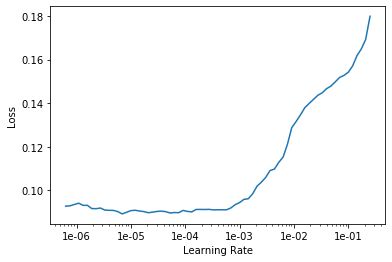

In [19]:
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(5, slice(1e-6, 5e-3))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.095912,0.091542,0.952927,0.917767,01:14
1,0.097667,0.091985,0.956385,0.920790,01:14
2,0.091104,0.088199,0.955259,0.924397,01:15
3,0.084487,0.084359,0.956727,0.927454,01:15
4,0.081529,0.083778,0.958878,0.928708,01:15


In [21]:
learn.save('stage2-50')

In [19]:
data = (src.transform(tfms, size=256)
       .databunch().normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [23]:
learn.freeze()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


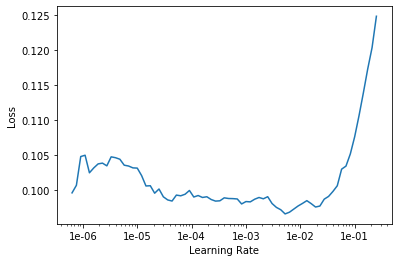

In [24]:
learn.lr_find()
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(5, slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.085333,0.086020,0.957672,0.926541,03:02
1,0.084014,0.084001,0.957309,0.928340,03:00
2,0.082460,0.083383,0.956640,0.928784,02:59
3,0.081943,0.082879,0.959183,0.930268,03:01
4,0.079716,0.082674,0.958544,0.929660,02:59


In [26]:
learn.save('stage1-256-50')